In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%matplotlib inline

In [21]:
def coin(p,x):
    return (np.random.rand(x)<p).astype(int)

In [49]:
coin(0.1,10)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
# say a fair coin with p = 0.5, 1 means 'head'
result = []
p = 0.5
for ii in range(100):
    result.append(coin(p,4))
result = np.array(result)

In [36]:
a = result - [1,1,1,1]
all4 = (np.sum(a,axis=1) == 0).astype(int)
allNOT4 = (np.sum(result,axis=1) == 0).astype(int)
get_a_head = 1- allNOT4
print('Game 1 pays $%d per play, and Game 2 pays $%d per play'%(20 * get_a_head.sum()/100, 
                                             500*all4.sum()/100))

Game 1 pays $19 per play, and Game 2 pays $55 per play


# Simulation on a fair coin

In [37]:
p = 0.5
simTime = 100
playTime = 100
results = []
for ii in range(simTime):
    result = []
    for jj in range(playTime):
        result.append(coin(p,4))
    result = np.array(result)
    a = result - [1,1,1,1]
    all4 = (np.sum(a,axis=1) == 0).astype(int)
    allNOT4 = (np.sum(result,axis=1) == 0).astype(int)
    get_a_head = 1- allNOT4
    results.append([20 * get_a_head.sum()/100,500*all4.sum()/100])

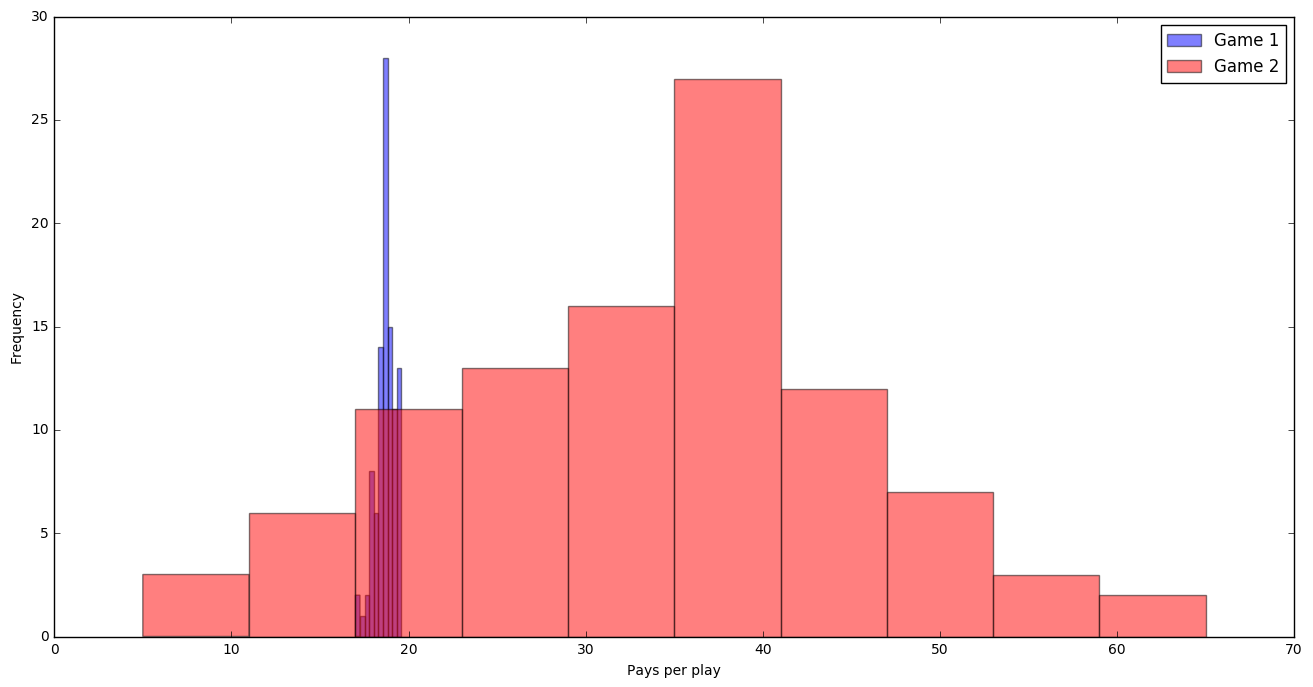

In [41]:
fig,ax = plt.subplots(figsize=(16,8))
results = np.array(results)
_=ax.hist(results[:,0],color='b',alpha=0.5,label='Game 1')
_=ax.hist(results[:,1],color='r',alpha=0.5,label='Game 2')
_=ax.set(xlabel='Pays per play',ylabel='Frequency')
_=ax.legend()

As you can see Game 1 has less variance but Game 2 pays more in long run. 

# However, it does NOT depend on how many times you play. 

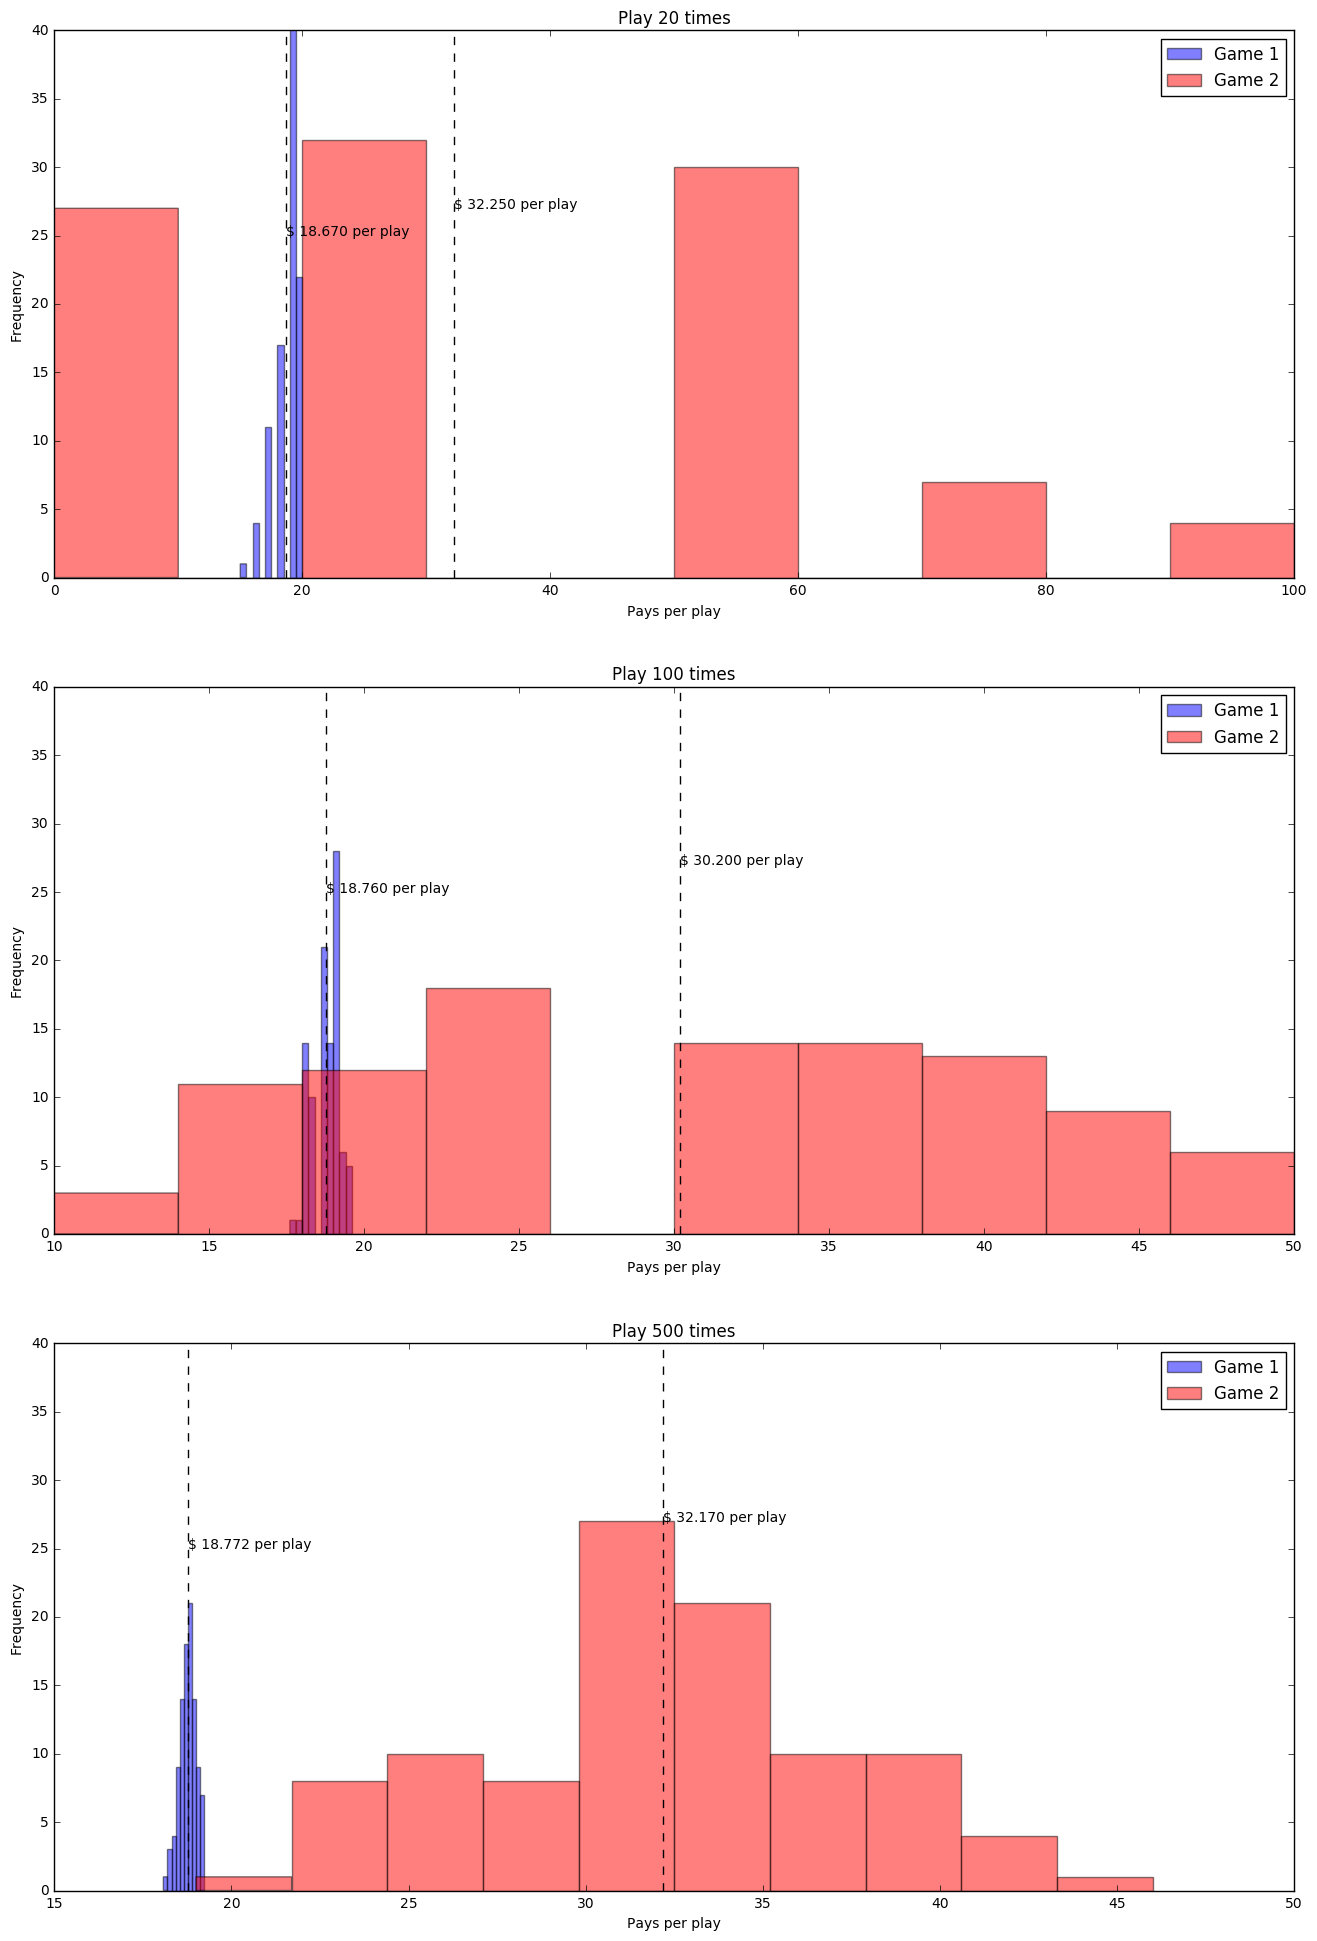

In [47]:
p = 0.5
simTime = 100
playTimes = [20,100,500]
fig,ax = plt.subplots(3,1,figsize=(16,24))
for aa,playTime in enumerate(playTimes):
    results = []
    for ii in range(simTime):
        result = []
        for jj in range(playTime):
            result.append(coin(p,4))
        result = np.array(result)
        a = result - [1,1,1,1]
        all4 = (np.sum(a,axis=1) == 0).astype(int)
        allNOT4 = (np.sum(result,axis=1) == 0).astype(int)
        get_a_head = 1- allNOT4
        results.append([20 * get_a_head.sum()/playTime,500*all4.sum()/playTime])
    
    results = np.array(results)
    _=ax[aa].hist(results[:,0],color='b',alpha=0.5,label='Game 1')
    _=ax[aa].hist(results[:,1],color='r',alpha=0.5,label='Game 2')
    _=ax[aa].axvline(results[:,0].mean(),color='k',linestyle='--')
    _=ax[aa].annotate('$ %.3f per play'%(results[:,0].mean()),
                      xy=(results[:,0].mean(),25))
    _=ax[aa].axvline(results[:,1].mean(),color='k',linestyle='--')
    _=ax[aa].annotate('$ %.3f per play'%(results[:,1].mean()),
                      xy=(results[:,1].mean(),27))
    _=ax[aa].set(xlabel='Pays per play',ylabel='Frequency',
                title='Play %d times'% playTime,ylim=(0,40))
    _=ax[aa].legend()

# Another question for me is: what if the coin is not fair?

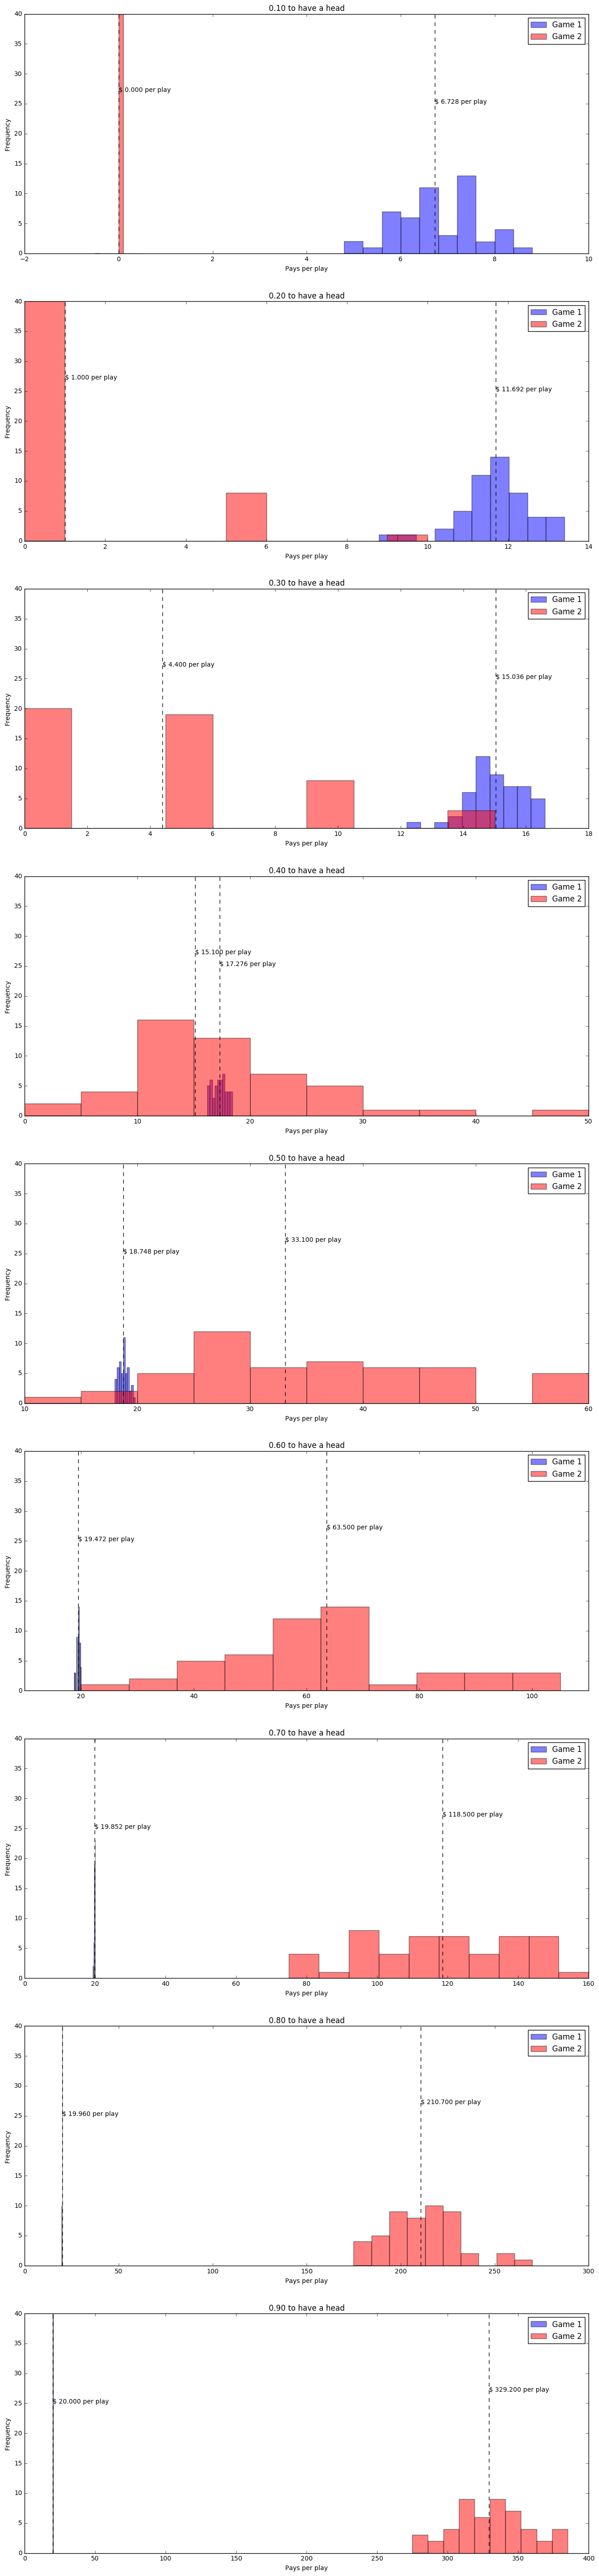

In [50]:
ps = np.arange(0.1,1.,0.1)
simTime = 50
playTime = 100
fig,ax = plt.subplots(len(ps),1,figsize=(16,8*len(ps)))
for aa,p in enumerate(ps):
    results = []
    for ii in range(simTime):
        result = []
        for jj in range(playTime):
            result.append(coin(p,4))
        result = np.array(result)
        a = result - [1,1,1,1]
        all4 = (np.sum(a,axis=1) == 0).astype(int)
        allNOT4 = (np.sum(result,axis=1) == 0).astype(int)
        get_a_head = 1- allNOT4
        results.append([20 * get_a_head.sum()/playTime,500*all4.sum()/playTime])
    
    results = np.array(results)
    _=ax[aa].hist(results[:,0],color='b',alpha=0.5,label='Game 1')
    _=ax[aa].hist(results[:,1],color='r',alpha=0.5,label='Game 2')
    _=ax[aa].axvline(results[:,0].mean(),color='k',linestyle='--')
    _=ax[aa].annotate('$ %.3f per play'%(results[:,0].mean()),
                      xy=(results[:,0].mean(),25))
    _=ax[aa].axvline(results[:,1].mean(),color='k',linestyle='--')
    _=ax[aa].annotate('$ %.3f per play'%(results[:,1].mean()),
                      xy=(results[:,1].mean(),27))
    _=ax[aa].set(xlabel='Pays per play',ylabel='Frequency',
                title='%.2f to have a head'% p,ylim=(0,40))
    _=ax[aa].legend()